In [3]:
! pip install pmdarima

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
shampoo = pd.read_csv("shampoo.csv")
shampoo.head()

,Month,Sales
0,1-01,266.0
1,1-02,145.9
2,1-03,183.1
3,1-04,119.3
4,1-05,180.3


In [6]:
shampoo = pd.read_csv("shampoo.csv", index_col=[0], parse_dates=True,squeeze=True)

In [7]:
type(shampoo)

pandas.core.series.Series

<AxesSubplot:xlabel='Month'>

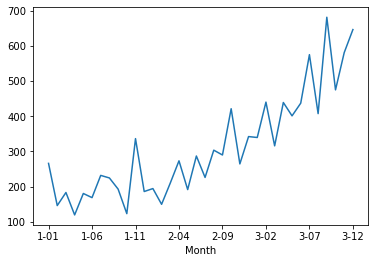

In [8]:
shampoo.plot()

In [9]:
shampoo.describe()

count     36.000000
mean     312.600000
std      148.937164
min      119.300000
25%      192.450000
50%      280.150000
75%      411.100000
max      682.000000
Name: Sales, dtype: float64

In [10]:
shampoo_ma = shampoo.rolling(window=10).mean()

<AxesSubplot:xlabel='Month'>

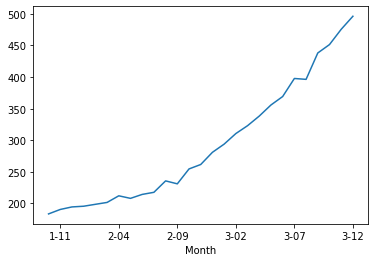

In [11]:
shampoo_ma.plot()

In [12]:
shampoo_base = pd.concat([shampoo, shampoo.shift(1)],axis=1)
shampoo_base.columns= ['Actual_Sales', 'Forecasting_Sales']
shampoo_base.dropna(inplace=True)
shampoo_base

,Actual_Sales,Forecasting_Sales
Month,,
1-02,145.9,266.0
1-03,183.1,145.9
1-04,119.3,183.1
1-05,180.3,119.3
1-06,168.5,180.3
1-07,231.8,168.5
1-08,224.5,231.8
1-09,192.8,224.5
1-10,122.9,192.8


In [13]:
from sklearn.metrics import mean_squared_error

In [14]:
shampoo_error = mean_squared_error(shampoo_base.Actual_Sales,shampoo_base.Forecasting_Sales)
shampoo_error

11715.388285714285

In [15]:
np.sqrt(shampoo_error)

108.23764726616282

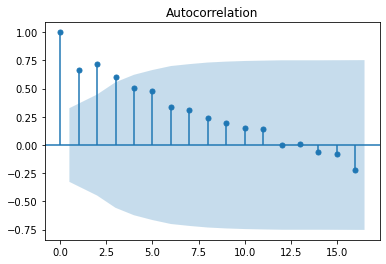

In [17]:
from statsmodels.graphics.tsaplots import plot_acf,plot_pacf
plot_acf(shampoo);

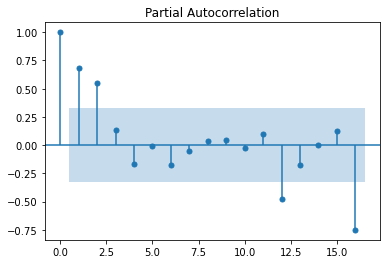

In [18]:
#q = 3, p = 2, d = 0 to 2
plot_pacf(shampoo);

In [24]:
from pmdarima.arima import ADFTest
from pmdarima.arima import auto_arima
adf_test = ADFTest(alpha=0.05)
adf_test.should_diff(shampoo)

(0.933218025378065, True)

In [25]:
shampoo_train = shampoo[0:24]
shampoo_test = shampoo[25:36]

<Figure size 5040x4320 with 0 Axes>

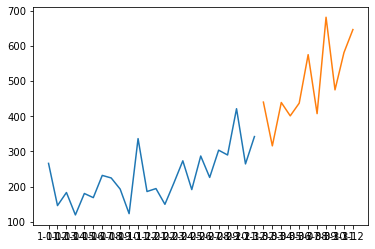

<Figure size 5040x4320 with 0 Axes>

In [40]:
plt.plot(shampoo_train)
plt.plot(shampoo_test)
plt.figure(figsize=(70, 60))

In [56]:
arima_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                     SARIMAX Results                                      
==========================================================================================
Dep. Variable:                                  y   No. Observations:                   24
Model:             SARIMAX(1, 1, 0)x(0, 1, 0, 12)   Log Likelihood                 -67.891
Date:                            Fri, 13 May 2022   AIC                            139.782
Time:                                    17:40:32   BIC                            140.577
Sample:                                         0   HQIC                           139.280
                                             - 24                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.7494      0.297     -2.526      0.012      -1.331      -0.168
sigma2      1.256e+04   6777.922      1.854      0.064    -721.468    2.58e+04
===================================================================================
Ljung-Box (L1) (Q):                   0.17   Jarque-Bera (JB):                 0.16
Prob(Q):                              0.68   Prob(JB):                         0.92
Heteroskedasticity (H):               3.22   Skew:                            -0.29
Prob(H) (two-sided):                  0.28   Kurtosis:                         3.09
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [57]:
prediction = pd.DataFrame(arima_model.predict(n_periods=36),index=list(shampoo.index))
prediction.columns = 'Predicted Sales'
prediction

TypeError: Index(...) must be called with a collection of some kind, 'Predicted Sales' was passed

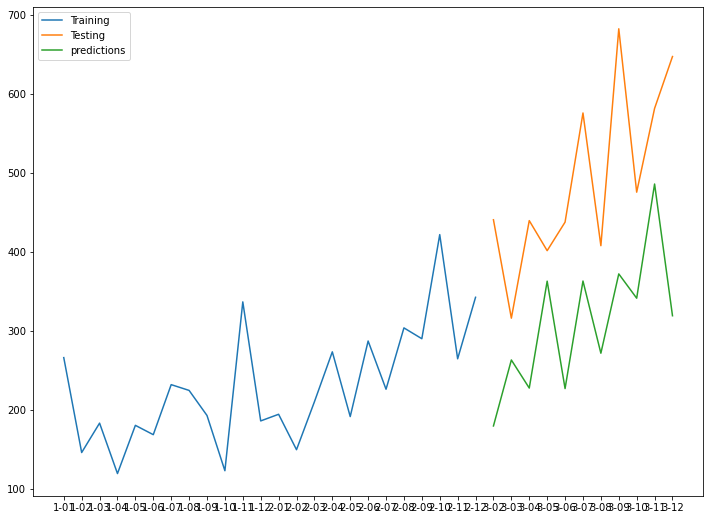

In [52]:
plt.figure(figsize=(12,9))
plt.plot(shampoo_train,label='Training')
plt.plot(shampoo_test,label='Testing')
plt.plot(prediction,label='predictions')
plt.legend(loc = 'upper left')